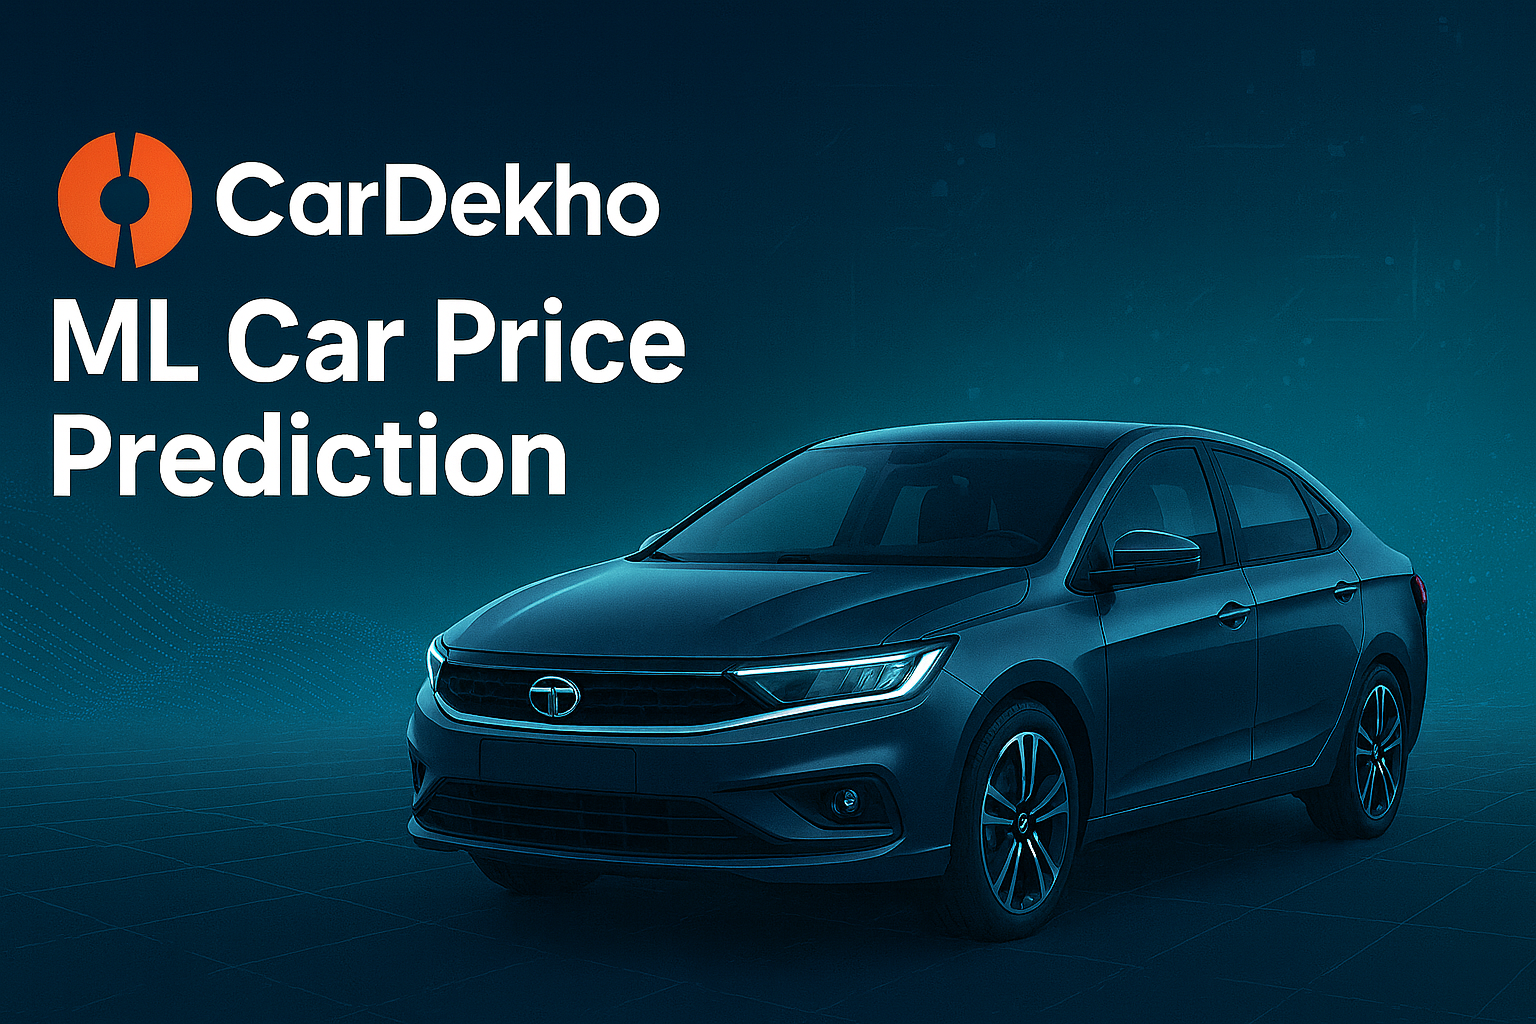

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder


In [4]:
# loading the dataset
df0 = pd.read_csv(r"C:\datasets\cardekho.csv")
df = df0.copy()
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3        90    5.0  
4      88.2    5.0

In [5]:
# shape of the dataset
shape = df.shape
print("Rows:", shape[0])
print("Columns:", shape[1])

Rows: 8128
Columns: 12


In [6]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [7]:
# max_power is 'object' converting it to 'float64'
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [8]:
# cheking null values
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             216
seats                 221
dtype: int64

In [9]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [10]:
shape = df.shape
print("Rows:", shape[0])
print("Columns:", shape[1])

Rows: 6926
Columns: 12


In [11]:
# resetting the index
df.reset_index(drop=True, inplace=True)

In [12]:
# dropping name column as it is not useful for prediction
df.drop(columns=['name'], inplace=True)

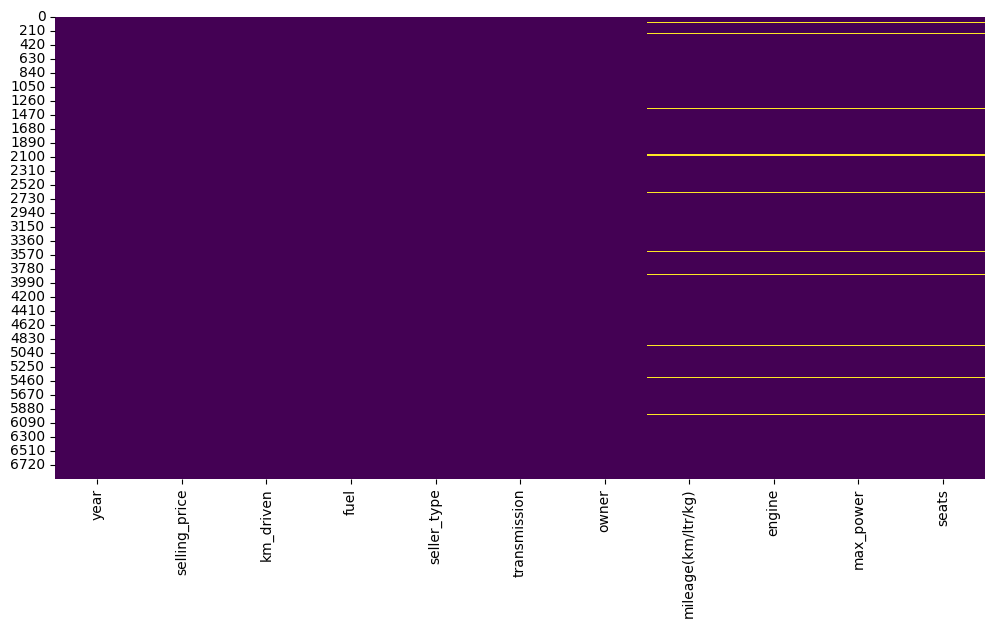

In [13]:
# plotting null values using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [14]:
# Imputing missing values using KNN Imputer

df_new = df.copy()

# columns to impute
num_cols = ["mileage(km/ltr/kg)", "engine", "max_power", "seats"]
cat_cols = ["fuel", "seller_type", "transmission", "owner"]

# --- Step 1: One-hot encode categorical columns ---
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
cat_encoded = ohe.fit_transform(df_new[cat_cols])
cat_encoded_df = pd.DataFrame(cat_encoded, 
                              columns=ohe.get_feature_names_out(cat_cols),
                              index=df_new.index)

# Combine numeric + one-hot categorical for KNN
knn_input = pd.concat([df_new[num_cols], cat_encoded_df], axis=1)

# --- Step 2: Apply KNN Imputer ---
imputer = KNNImputer(n_neighbors=8, weights="distance")
knn_imputed = imputer.fit_transform(knn_input)

imputed_df = pd.DataFrame(knn_imputed, columns=knn_input.columns, index=df_new.index)

# --- Step 3: Put imputed numeric columns back into main df_new ---
for col in num_cols:
    df_new[col] = imputed_df[col]

# Fix integer column
df_new["seats"] = df_new["seats"].round().astype("Int64")

# Check nulls
print(df_new[num_cols].isnull().sum())


mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


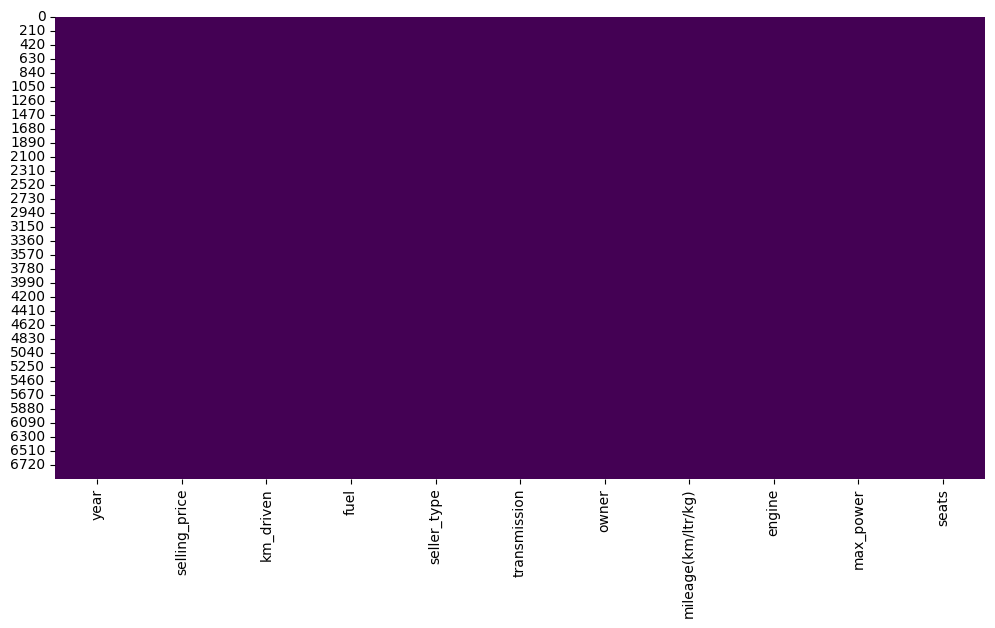

In [15]:
# plotting null values using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_new.isnull(), cbar=False, cmap='viridis')
plt.show()

In [16]:
df_new.tail()

year  selling_price  km_driven    fuel seller_type transmission  \
6921  2013         260000      50000  Petrol  Individual       Manual   
6922  2014         475000      80000  Diesel  Individual       Manual   
6923  2013         320000     110000  Petrol  Individual       Manual   
6924  2007         135000     119000  Diesel  Individual       Manual   
6925  2009         382000     120000  Diesel  Individual       Manual   

                     owner  mileage(km/ltr/kg)  engine  max_power  seats  
6921          Second Owner               18.90   998.0      67.10      5  
6922          Second Owner               22.54  1396.0      88.73      5  
6923           First Owner               18.50  1197.0      82.85      5  
6924  Fourth & Above Owner               16.80  1493.0     110.00      5  
6925           First Owner               19.30  1248.0      73.90      5

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                6926 non-null   int64  
 1   selling_price       6926 non-null   int64  
 2   km_driven           6926 non-null   int64  
 3   fuel                6926 non-null   object 
 4   seller_type         6926 non-null   object 
 5   transmission        6926 non-null   object 
 6   owner               6926 non-null   object 
 7   mileage(km/ltr/kg)  6926 non-null   float64
 8   engine              6926 non-null   float64
 9   max_power           6926 non-null   float64
 10  seats               6926 non-null   Int64  
dtypes: Int64(1), float64(3), int64(3), object(4)
memory usage: 602.1+ KB


In [18]:
numeric_cols_df = df_new.select_dtypes(include=['int64', 'float64'])
numeric_cols_df

year  selling_price  km_driven  mileage(km/ltr/kg)  engine  max_power  \
0     2014         450000     145500               23.40  1248.0      74.00   
1     2014         370000     120000               21.14  1498.0     103.52   
2     2006         158000     140000               17.70  1497.0      78.00   
3     2010         225000     127000               23.00  1396.0      90.00   
4     2007         130000     120000               16.10  1298.0      88.20   
...    ...            ...        ...                 ...     ...        ...   
6921  2013         260000      50000               18.90   998.0      67.10   
6922  2014         475000      80000               22.54  1396.0      88.73   
6923  2013         320000     110000               18.50  1197.0      82.85   
6924  2007         135000     119000               16.80  1493.0     110.00   
6925  2009         382000     120000               19.30  1248.0      73.90   

      seats  
0         5  
1         5  
2         5  
3         5  
4         5  
...     ...  
6921      5  
6922      5  
6923      5  
6924      5  
6925      5  

[6926 rows x 7 columns]

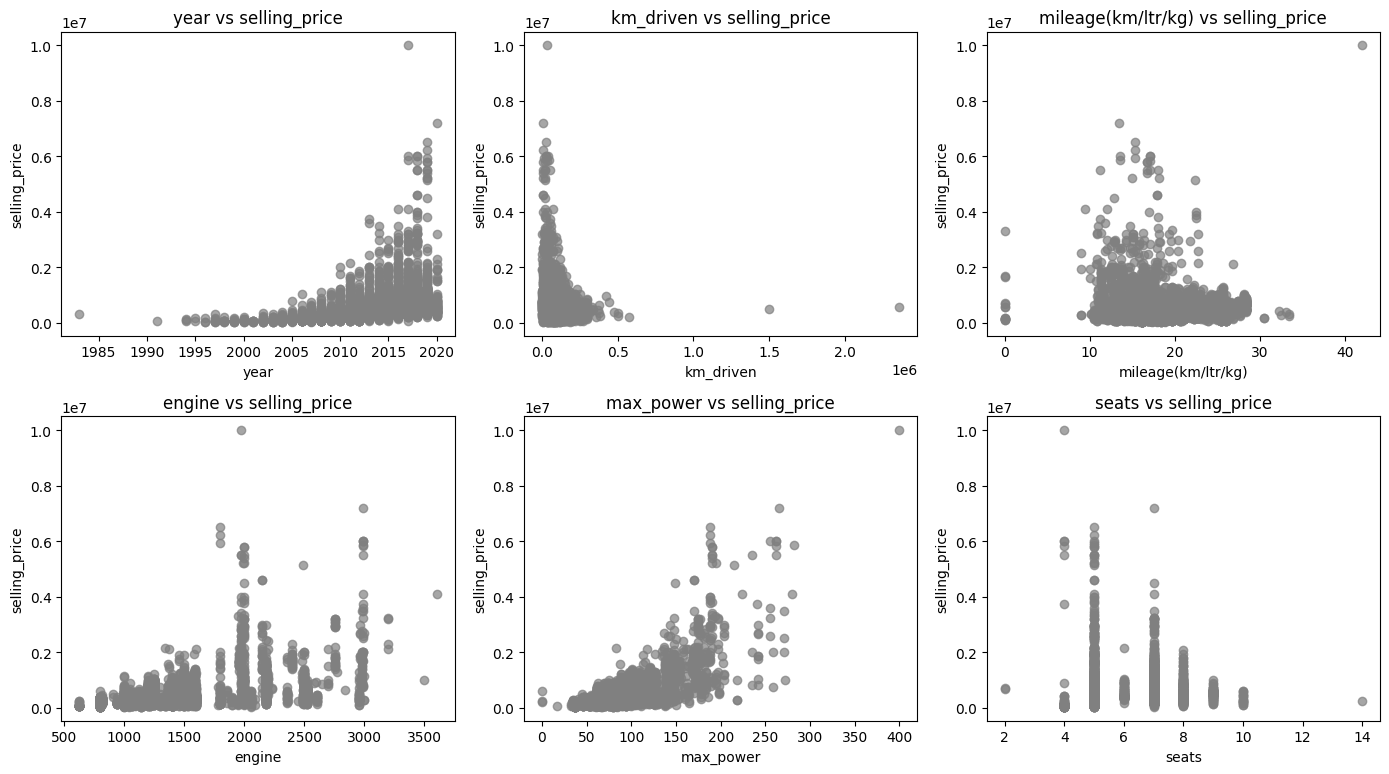

In [19]:
# plotting scatter plots for numeric columns vs 'selling_price'
target_col = 'selling_price'
numeric_cols = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
n = len(numeric_cols)
n_rows = 2
n_cols = 3

fig , axes = plt.subplots(n_rows , n_cols , figsize = (14 , 4 * n_rows))
axes = axes.flatten()

for i , col in enumerate(numeric_cols) : 
    axes[i].scatter(numeric_cols_df[col] , numeric_cols_df[target_col] , alpha = 0.7, color = 'grey')
    axes[i].set_title(f'{col} vs {target_col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)

plt.tight_layout()
plt.show()

In [20]:
# getting categorical columns
categorical_df = df_new.select_dtypes(include=['object'])
categorical_df

fuel seller_type transmission                 owner
0     Diesel  Individual       Manual           First Owner
1     Diesel  Individual       Manual          Second Owner
2     Petrol  Individual       Manual           Third Owner
3     Diesel  Individual       Manual           First Owner
4     Petrol  Individual       Manual           First Owner
...      ...         ...          ...                   ...
6921  Petrol  Individual       Manual          Second Owner
6922  Diesel  Individual       Manual          Second Owner
6923  Petrol  Individual       Manual           First Owner
6924  Diesel  Individual       Manual  Fourth & Above Owner
6925  Diesel  Individual       Manual           First Owner

[6926 rows x 4 columns]

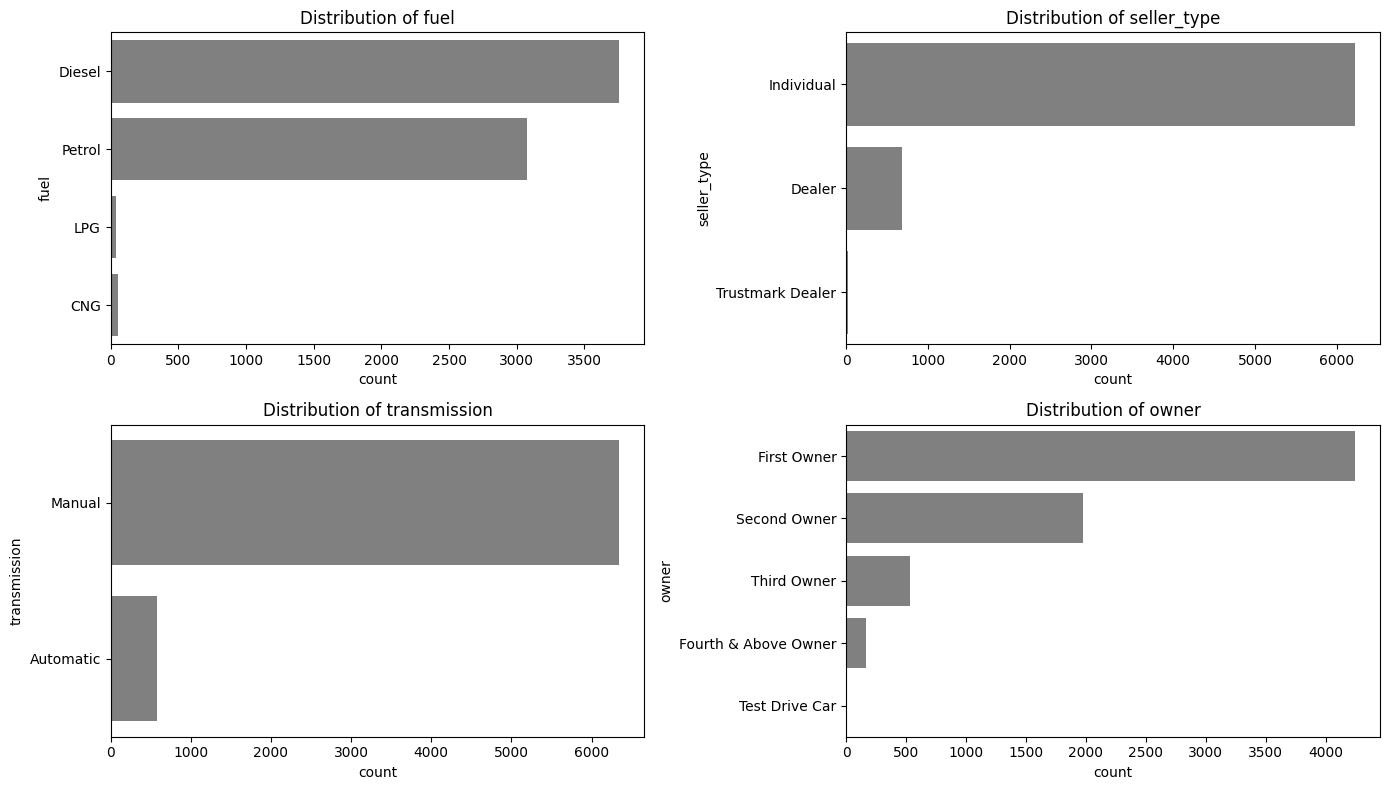

In [21]:
# plotting count plots for categorical columns
categorical_cols = categorical_df.columns.tolist()
n_rows = 2
n_cols = 2

fig , axes = plt.subplots(n_rows , n_cols , figsize = (14 , 4 * n_rows))
axes = axes.flatten()

for i , col in enumerate(categorical_cols) : 
    sns.countplot(y=categorical_df[col], ax=axes[i], color='grey')
    axes[i].set_title(f'Distribution of {col}')


plt.tight_layout()
plt.show()

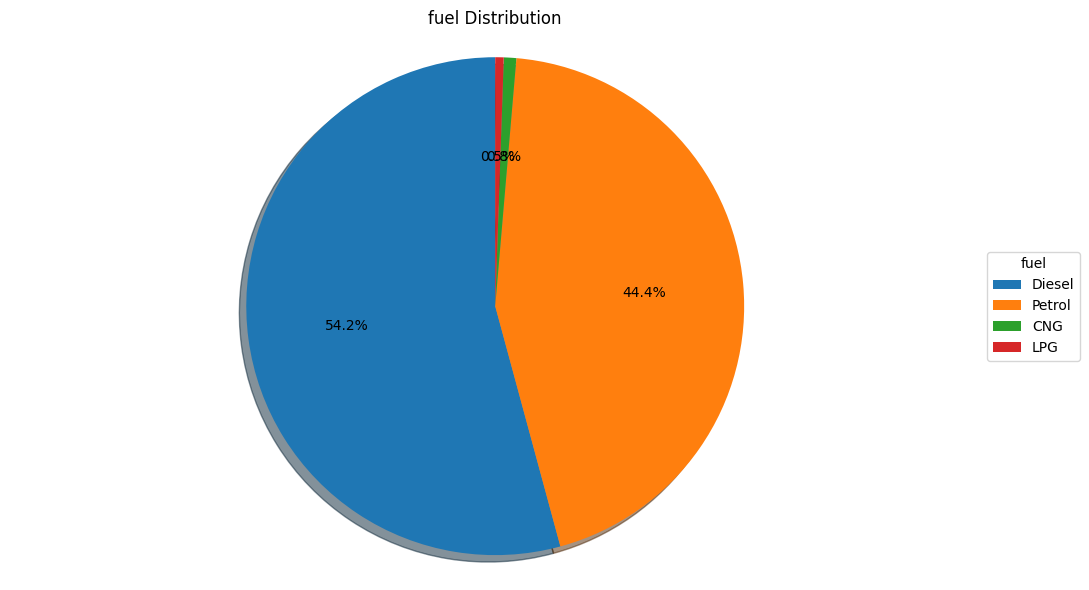

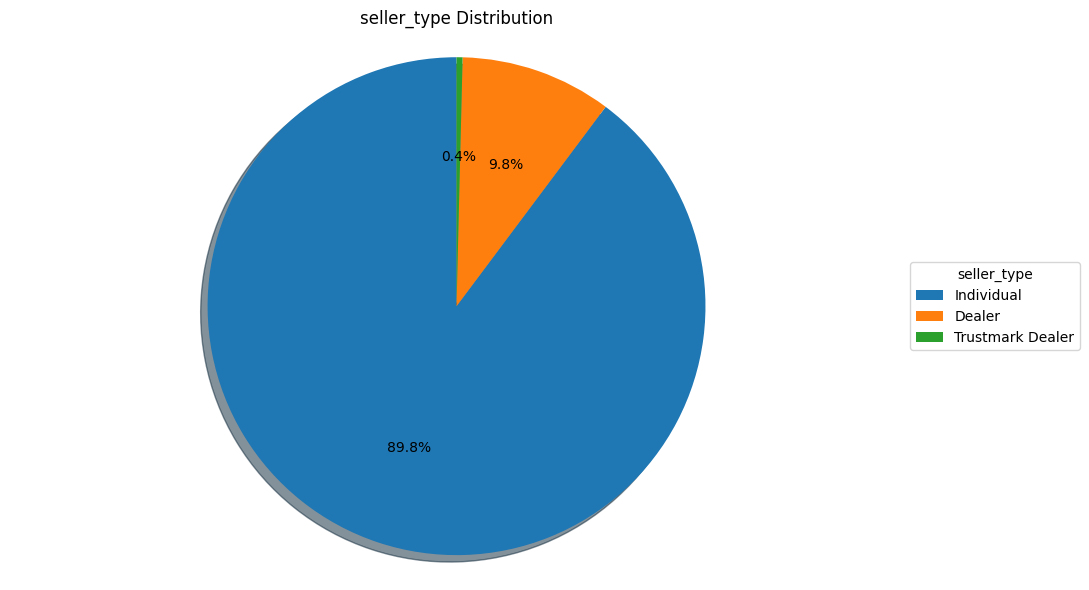

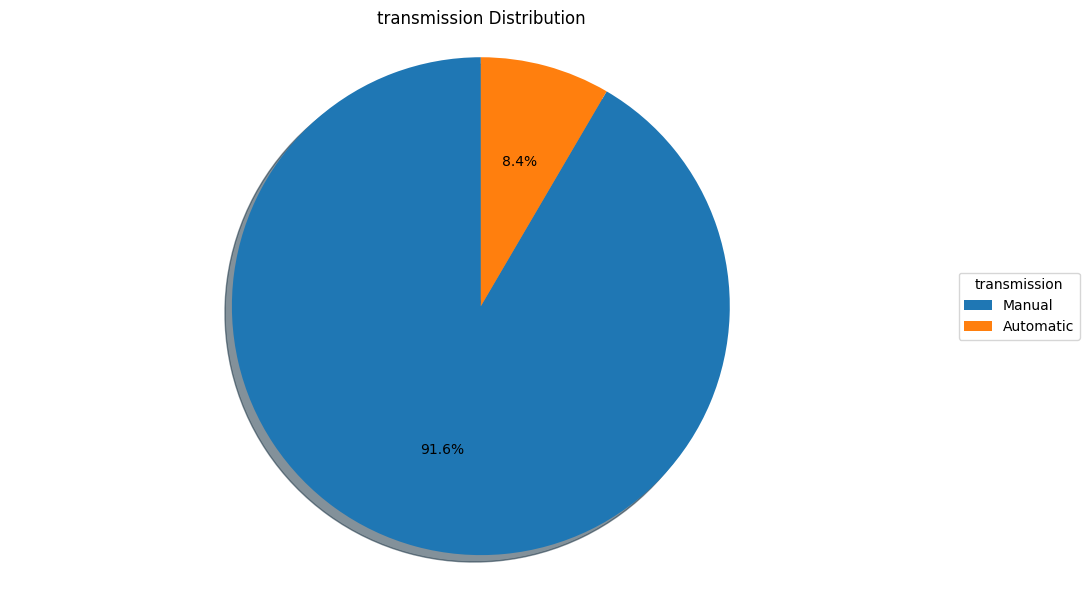

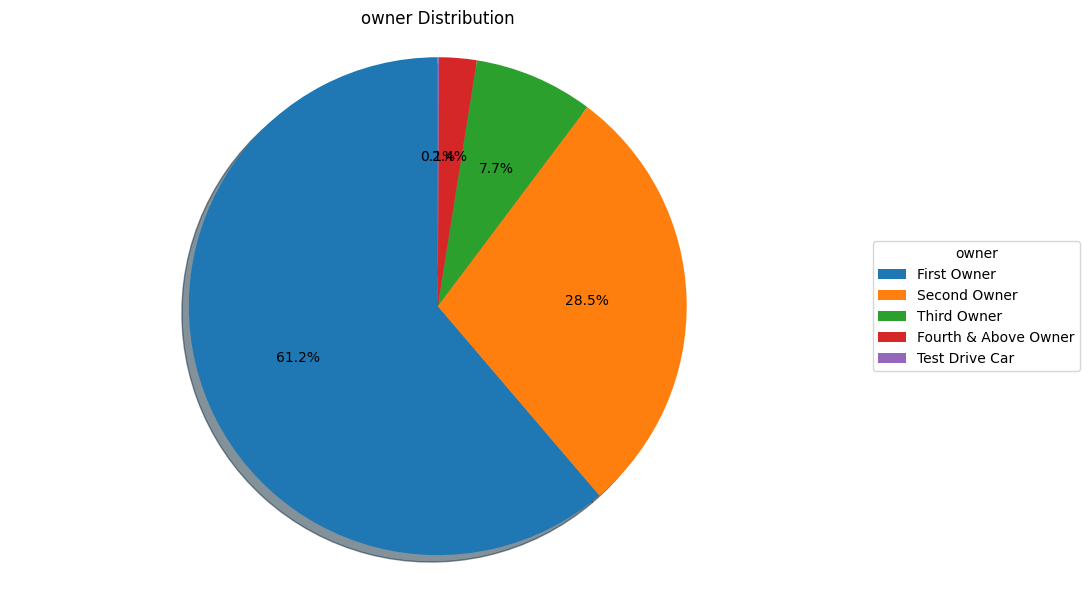

In [22]:
# plotting pie charts for categorical columns
for col in categorical_cols:
    counts = categorical_df[col].value_counts()
    labels = counts.index
    sizes = counts.values

    plt.figure(figsize=(11, 6))
    wedges, texts, autotexts = plt.pie(
        sizes,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )

    plt.legend(wedges, labels, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'{col} Distribution')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

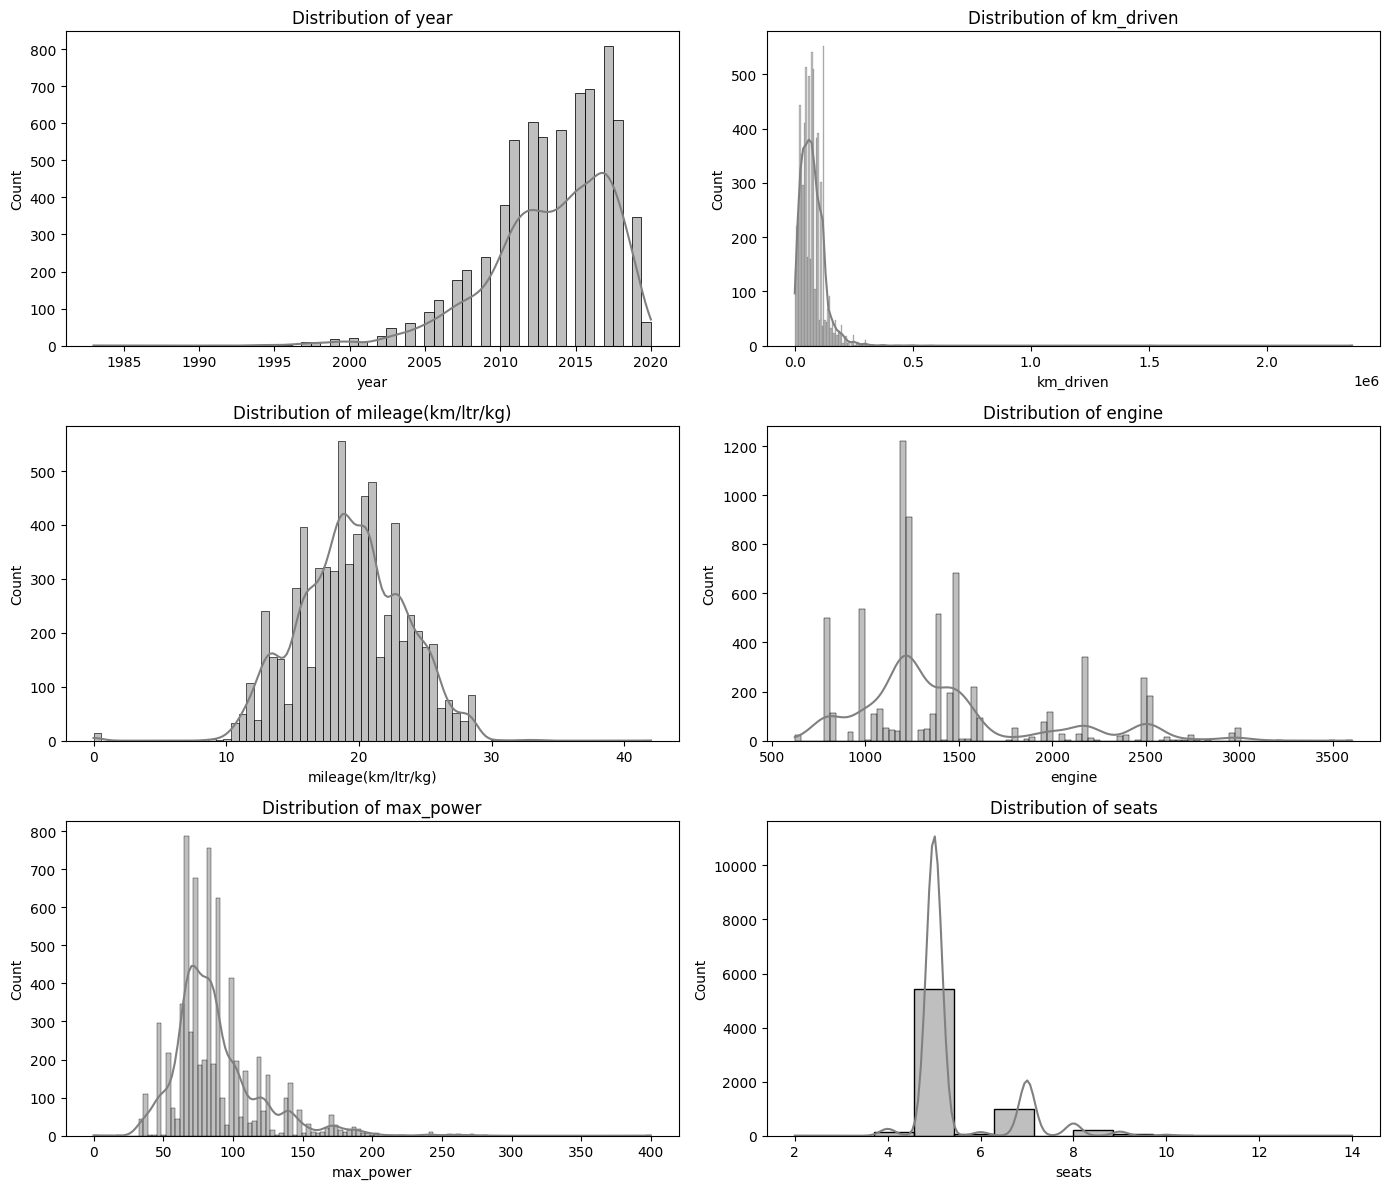

In [23]:
# plotting distribution plots for numeric columns vs 'selling_price'
target_col = 'selling_price'
numeric_cols = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
n = len(numeric_cols)
n_rows = 3
n_cols = 2

fig , axes = plt.subplots(n_rows , n_cols , figsize = (14 , 4 * n_rows))
axes = axes.flatten()

for i , col in enumerate(numeric_cols) : 
    sns.histplot(numeric_cols_df[col], kde=True, ax=axes[i], color='grey')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

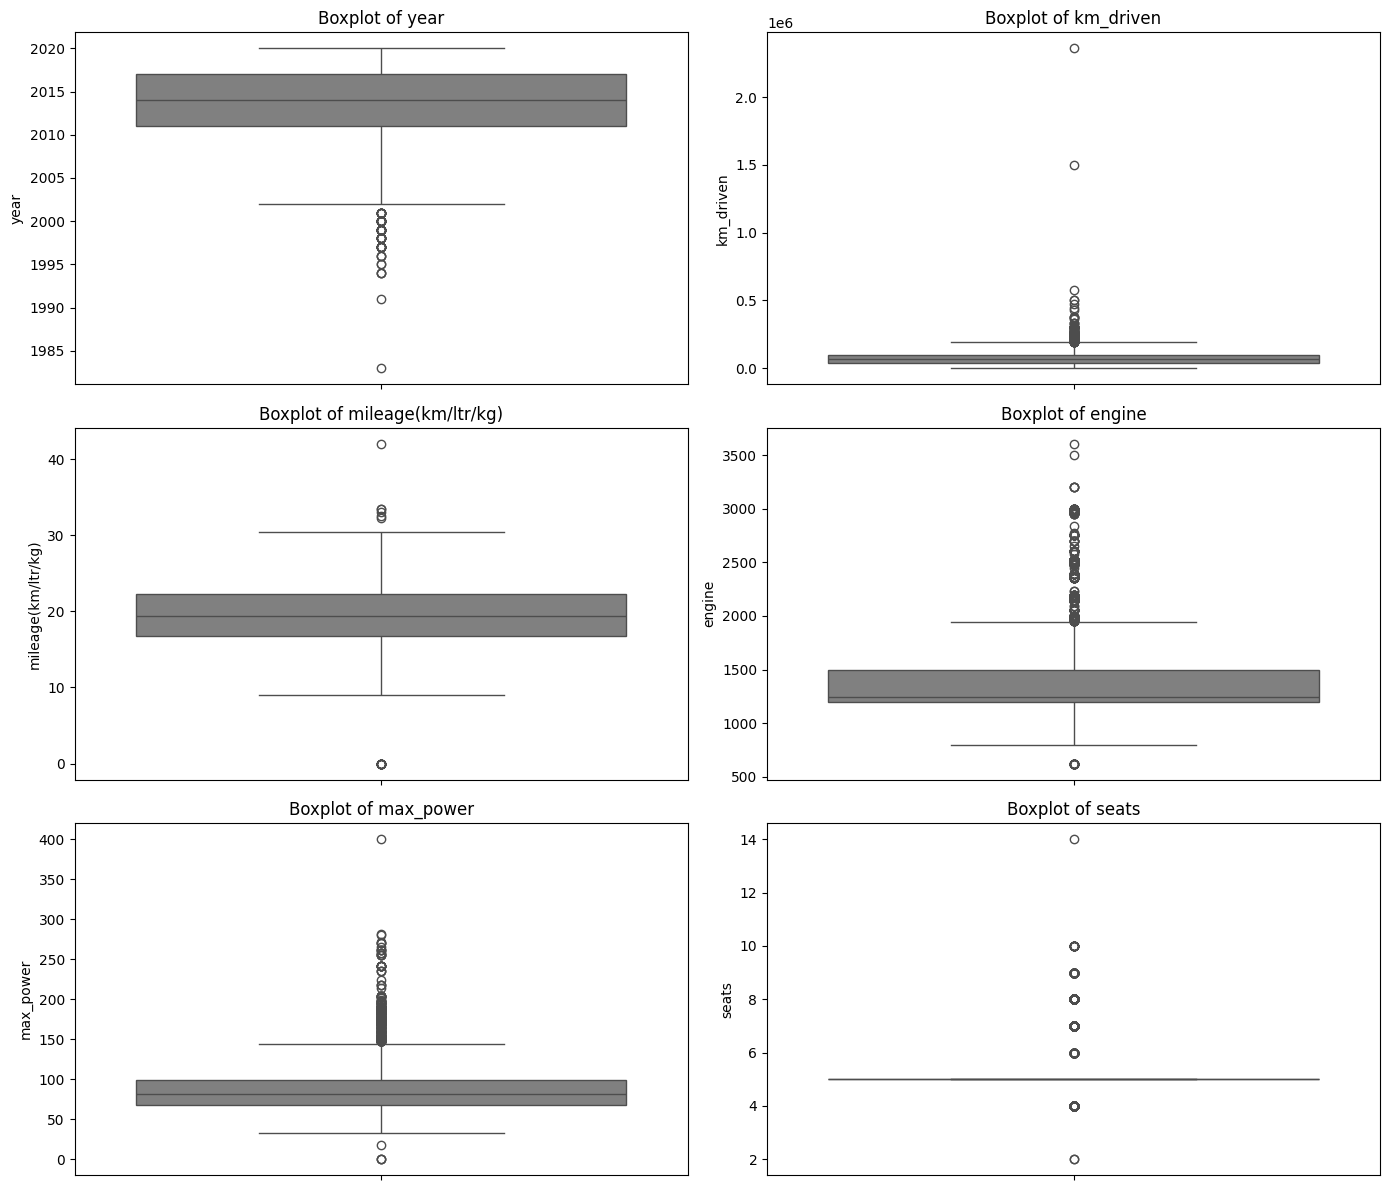

In [24]:
# plotting boxplots for numeric columns 
n_rows = 3
n_cols = 2

fig , axes = plt.subplots(n_rows , n_cols , figsize = (14 , 4 * n_rows))
axes = axes.flatten()

for i , col in enumerate(numeric_cols) : 
    sns.boxplot(y=numeric_cols_df[col], ax=axes[i], color='grey')
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

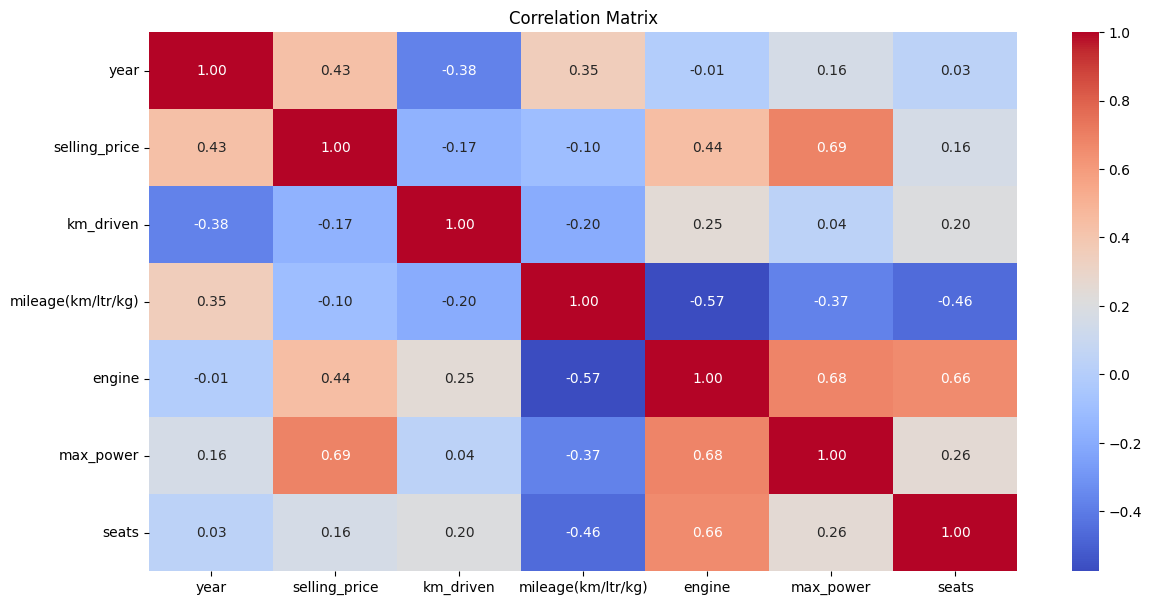

In [25]:
# plotting heatmap for correlation matrix
plt.figure(figsize=(14, 7))
df_corr = numeric_cols_df.corr()
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
df_new.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage(km/ltr/kg)  engine  max_power  seats  
0   First Owner               23.40  1248.0      74.00      5  
1  Second Owner               21.14  1498.0     103.52      5  
2   Third Owner               17.70  1497.0      78.00      5  
3   First Owner               23.00  1396.0      90.00      5  
4   First Owner               16.10  1298.0      88.20      5

In [27]:
print(f"categorical_cols: {categorical_cols}")
print(f"numeric_cols: {numeric_cols}")

categorical_cols: ['fuel', 'seller_type', 'transmission', 'owner']
numeric_cols: ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']


In [28]:
# Feature encoding
df_encoded = pd.get_dummies(df_new, columns=categorical_cols, drop_first=True)

In [29]:
df_encoded.head()

year  selling_price  km_driven  mileage(km/ltr/kg)  engine  max_power  \
0  2014         450000     145500               23.40  1248.0      74.00   
1  2014         370000     120000               21.14  1498.0     103.52   
2  2006         158000     140000               17.70  1497.0      78.00   
3  2010         225000     127000               23.00  1396.0      90.00   
4  2007         130000     120000               16.10  1298.0      88.20   

   seats  fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0      5         True     False        False                    True   
1      5         True     False        False                    True   
2      5        False     False         True                    True   
3      5         True     False        False                    True   
4      5        False     False         True                    True   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                         False                 True   
1                         False                 True   
2                         False                 True   
3                         False                 True   
4                         False                 True   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                       False               False                 False   
1                       False                True                 False   
2                       False               False                 False   
3                       False               False                 False   
4                       False               False                 False   

   owner_Third Owner  
0              False  
1              False  
2               True  
3              False  
4              False

In [30]:
# Feature scaling
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded = df_encoded.astype(float)

In [31]:
df_encoded

year  selling_price  km_driven  mileage(km/ltr/kg)    engine  \
0     0.142153       450000.0   1.225357            0.988943 -0.369645   
1     0.142153       370000.0   0.788368            0.424796  0.140720   
2    -1.819597       158000.0   1.131104           -0.433904  0.138678   
3    -0.838722       225000.0   0.908326            0.889094 -0.067509   
4    -1.574378       130000.0   0.788368           -0.833300 -0.267572   
...        ...            ...        ...                 ...       ...   
6921 -0.103066       260000.0  -0.411210           -0.134357 -0.880009   
6922  0.142153       475000.0   0.102895            0.774268 -0.067509   
6923 -0.103066       320000.0   0.617000           -0.234206 -0.473759   
6924 -1.574378       135000.0   0.771231           -0.658564  0.130512   
6925 -1.083940       382000.0   0.788368           -0.034509 -0.369645   

      max_power     seats  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0     -0.429929 -0.441884          1.0       0.0          0.0   
1      0.508728 -0.441884          1.0       0.0          0.0   
2     -0.302740 -0.441884          0.0       0.0          1.0   
3      0.078828 -0.441884          1.0       0.0          0.0   
4      0.021593 -0.441884          0.0       0.0          1.0   
...         ...       ...          ...       ...          ...   
6921  -0.649331 -0.441884          0.0       0.0          1.0   
6922   0.038446 -0.441884          1.0       0.0          0.0   
6923  -0.148523 -0.441884          0.0       0.0          1.0   
6924   0.714775 -0.441884          1.0       0.0          0.0   
6925  -0.433109 -0.441884          1.0       0.0          0.0   

      seller_type_Individual  seller_type_Trustmark Dealer  \
0                        1.0                           0.0   
1                        1.0                           0.0   
2                        1.0                           0.0   
3                        1.0                           0.0   
4                        1.0                           0.0   
...                      ...                           ...   
6921                     1.0                           0.0   
6922                     1.0                           0.0   
6923                     1.0                           0.0   
6924                     1.0                           0.0   
6925                     1.0                           0.0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                     1.0                         0.0                 0.0   
1                     1.0                         0.0                 1.0   
2                     1.0                         0.0                 0.0   
3                     1.0                         0.0                 0.0   
4                     1.0                         0.0                 0.0   
...                   ...                         ...                 ...   
6921                  1.0                         0.0                 1.0   
6922                  1.0                         0.0                 1.0   
6923                  1.0                         0.0                 0.0   
6924                  1.0                         1.0                 0.0   
6925                  1.0                         0.0                 0.0   

      owner_Test Drive Car  owner_Third Owner  
0                      0.0                0.0  
1                      0.0                0.0  
2                      0.0                1.0  
3                      0.0                0.0  
4                      0.0                0.0  
...                    ...                ...  
6921                   0.0                0.0  
6922                   0.0                0.0  
6923                   0.0                0.0  
6924                   0.0                0.0  
6925                   0.0                0.0  

[6926 rows x 17 columns]

In [32]:
# crearting feature and target variables
X = df_encoded.drop(columns='selling_price', axis=1)
y = df_encoded['selling_price']

In [33]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# dictionary to store model results
data_dict = {"model_name": [],
             "train_r2": [],
             "test_r2": [],
             "mse" : [],
             "mae": [],
             "predictions": []}

In [35]:
# function for k-fold cross validation and model training
def kfolds(model, model_name, X, y, cv=10):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring="r2")   # keep r2 for CV
    cv_mean   = np.mean(cv_scores)
    print(f"{model_name} CV R² (mean of {cv} folds): {cv_mean*100:.2f}%\n")


def train(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    train_r2 = model.score(X_train, y_train)
    test_r2  = model.score(X_test,  y_test)

    y_pred   = model.predict(X_test)
    mse  = mean_squared_error(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    data_dict["model_name"].append(model_name)
    data_dict["train_r2"].append(round(train_r2*100, 2))
    data_dict["test_r2"].append(round(test_r2*100, 2))
    data_dict["mse"].append(round(mse, 2))
    data_dict["mae"].append(round(mae, 2))
    data_dict["predictions"].append(y_pred)
    print(f"{model_name} performance")
    print("-"*40)
    print(f"R² (train) : {train_r2*100:.2f}%")
    print(f"R² (test)  : {test_r2*100:.2f}%")
    print(f"MSE (test) : {mse:.2f}")
    print(f"MAE (test) : {mae:.2f}\n")

In [36]:
model_linearregressor = LinearRegression()
kfolds(model_linearregressor, "Linear Regression", X, y)         
train(model_linearregressor, "Linear Regression",                 
      X_train, X_test, y_train, y_test)

Linear Regression CV R² (mean of 10 folds): 59.89%

Linear Regression performance
----------------------------------------
R² (train) : 65.58%
R² (test)  : 54.47%
MSE (test) : 99855653066.07
MAE (test) : 172232.38



In [37]:
model_GradientBoostingRegressor = GradientBoostingRegressor(random_state=42)
kfolds(model_GradientBoostingRegressor, "Gradient Boosting Regressor", X, y)         
train(model_GradientBoostingRegressor, "Gradient Boosting Regressor",
        X_train, X_test, y_train, y_test)

Gradient Boosting Regressor CV R² (mean of 10 folds): 87.28%

Gradient Boosting Regressor performance
----------------------------------------
R² (train) : 93.69%
R² (test)  : 90.53%
MSE (test) : 20767641016.30
MAE (test) : 89545.87



In [38]:
model_RandomForestRegressor = RandomForestRegressor(random_state=42)
kfolds(model_RandomForestRegressor, "Random Forest Regressor", X, y)
train(model_RandomForestRegressor, "Random Forest Regressor",
      X_train, X_test, y_train, y_test)


Random Forest Regressor CV R² (mean of 10 folds): 88.77%

Random Forest Regressor performance
----------------------------------------
R² (train) : 98.47%
R² (test)  : 91.89%
MSE (test) : 17777536390.49
MAE (test) : 74455.90



In [39]:
model_Lasso = Lasso(random_state=42)
kfolds(model_Lasso, "Lasso Regressor", X, y)
train(model_Lasso, "Lasso Regressor",
      X_train, X_test, y_train, y_test)

Lasso Regressor CV R² (mean of 10 folds): 59.89%

Lasso Regressor performance
----------------------------------------
R² (train) : 65.58%
R² (test)  : 54.47%
MSE (test) : 99849834893.56
MAE (test) : 172230.72



In [40]:
model_KNeighborsRegressor = KNeighborsRegressor()
kfolds(model_KNeighborsRegressor, "K-Neighbors Regressor", X, y)
train(model_KNeighborsRegressor, "K-Neighbors Regressor",
      X_train, X_test, y_train, y_test)

K-Neighbors Regressor CV R² (mean of 10 folds): 82.41%

K-Neighbors Regressor performance
----------------------------------------
R² (train) : 91.14%
R² (test)  : 84.09%
MSE (test) : 34901864780.65
MAE (test) : 94257.51



In [41]:
model_BaggingRegressor = BaggingRegressor(random_state=42)
kfolds(model_BaggingRegressor, "Bagging Regressor", X, y)
train(model_BaggingRegressor, "Bagging Regressor",
      X_train, X_test, y_train, y_test)

Bagging Regressor CV R² (mean of 10 folds): 87.68%

Bagging Regressor performance
----------------------------------------
R² (train) : 98.19%
R² (test)  : 90.54%
MSE (test) : 20748933745.48
MAE (test) : 77722.85



In [42]:
data_df = pd.DataFrame(data_dict)
data_df

model_name  train_r2  test_r2           mse        mae  \
0            Linear Regression     65.58    54.47  9.985565e+10  172232.38   
1  Gradient Boosting Regressor     93.69    90.53  2.076764e+10   89545.87   
2      Random Forest Regressor     98.47    91.89  1.777754e+10   74455.90   
3              Lasso Regressor     65.58    54.47  9.984983e+10  172230.72   
4        K-Neighbors Regressor     91.14    84.09  3.490186e+10   94257.51   
5            Bagging Regressor     98.19    90.54  2.074893e+10   77722.85   

                                         predictions  
0  [393179.8649776265, 1199957.9693043248, 774652...  
1  [528283.6477923518, 987801.8361758374, 755313....  
2  [628409.95, 1063636.4166666665, 842360.0, 1487...  
3  [393167.5769166717, 1199953.634834514, 774649....  
4  [609000.0, 1094999.8, 876800.0, 114000.0, 8936...  
5  [594000.0, 1050499.6, 860900.0, 140400.0, 7296...

In [43]:
data_df.columns.tolist()

['model_name', 'train_r2', 'test_r2', 'mse', 'mae', 'predictions']

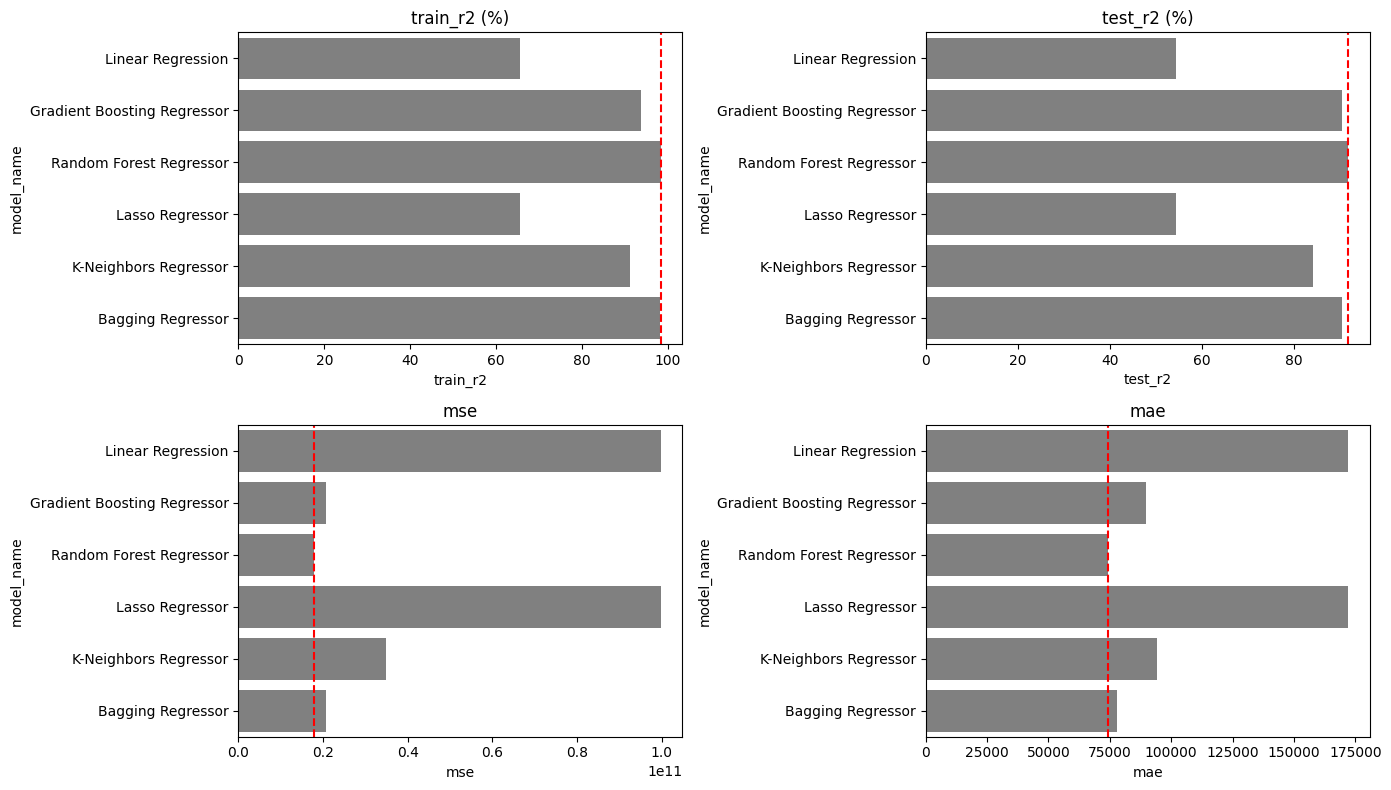

In [44]:
# plotting bar plots for metrics
metrics = ['train_r2', 'test_r2', 'mse', 'mae']
n_rows = 2
n_cols = 2
colors = ['blue', 'coral', 'green', 'yellow']
fig , axes = plt.subplots(n_rows , n_cols , figsize = (14 , 4 * n_rows))
axes = axes.flatten()

for i , col in enumerate(metrics) : 
    sns.barplot(x=data_df[col],y=data_df['model_name'], ax=axes[i], color='grey')
    # plot a vertical line for top and low metric value
    if col in ['train_r2', 'test_r2']:
        top_value = data_df[col].max()
        axes[i].axvline(top_value, color='red', linestyle='--')
    else:
        best_value = data_df[col].min()
        axes[i].axvline(best_value, color='red', linestyle='--')
    

    if col in ['train_r2', 'test_r2']:
        axes[i].set_title(f'{col} (%)')
    else:
        axes[i].set_title(col)
    
    
plt.tight_layout()
plt.show()

Best Performing Model: Random Forest Regressor

The Random Forest Regressor achieved the strongest overall performance, showing:

Train R²: 98.47%

Test R²: 91.89%

Lowest MSE: 1.78 × 10¹⁰

Lowest MAE: 74,455.90

This indicates that Random Forest captures underlying patterns accurately while maintaining good generalization. The model shows minimal overfitting and consistently predicts values close to the true targets, making it the most reliable choice for this dataset.

Top Contenders
1. Bagging Regressor

Train R²: 98.19%

Test R²: 90.54%

MSE / MAE: Competitive with Random Forest
Bagging performs similarly to Random Forest but shows slightly higher prediction error. Still a strong model for ensembles.

2. Gradient Boosting Regressor

Train R²: 93.69%

Test R²: 90.53%
Gradient Boosting generalizes well with stable performance. Although slightly less accurate than Random Forest, it remains a robust option for complex nonlinear relationships.

Underperforming Models
Linear Regression & Lasso Regression

Train R²: 65.58%

Test R²: 54.47%

High MSE & MAE

These linear models significantly underfit the data, indicating that the underlying relationships are nonlinear and cannot be captured with simple linear assumptions. These models show large errors and poor predictive capability.

K-Neighbors Regressor

Train R²: 91.14%

Test R²: 84.09%
KNN performs moderately well but suffers from sensitivity to scaling and distance-based errors, especially for high-value observations.

Conclusion

Based on the comprehensive evaluation across accuracy and error metrics:

Random Forest Regressor is the optimal model

It offers the highest predictive power, strong generalization, and lowest error, making it the most suitable regression model for this project.


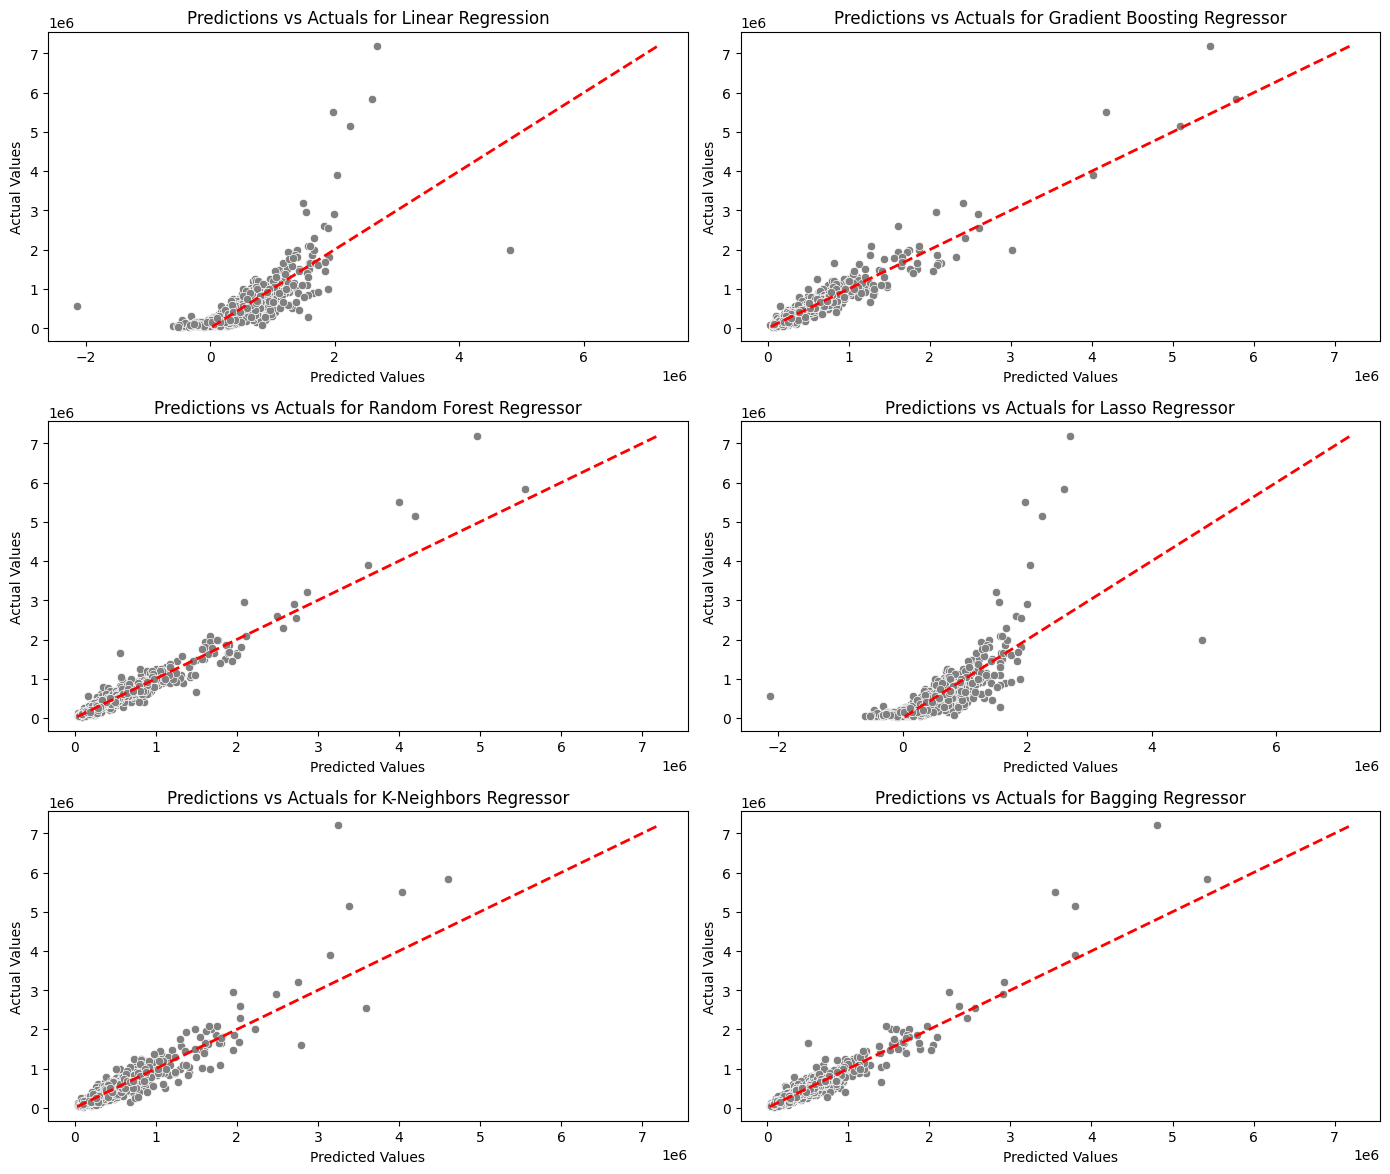

In [45]:
# plotting scatterplots over models
n_rows = 3
n_cols = 2
colors = ['blue', 'coral', 'green', 'yellow']
fig , axes = plt.subplots(n_rows , n_cols , figsize = (14 , 4 * n_rows))
axes = axes.flatten()

for i in range(len(data_df['model_name'])):
    sns.scatterplot(x=data_dict['predictions'][i], y = y_test, ax=axes[i], color='grey')
    # Draw perfect prediction line y = x
    axes[i].plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color='red', 
        linestyle='--', 
        linewidth=2
    )

    axes[i].set_title(f'Predictions vs Actuals for {data_dict["model_name"][i]}')
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Actual Values')
    
    
plt.tight_layout()
plt.show()

### Predictions vs Actuals: Visual Diagnostic Analysis

To understand how effectively each model predicts housing prices, scatter plots were generated comparing predicted values (x-axis) against actual values (y-axis). A red dashed line represents the ideal scenario (y = x), where predictions match actuals perfectly. Models with points more tightly clustered around this line demonstrate higher predictive accuracy and lower error.

Random Forest Regressor — Best Visual Fit

The Random Forest plot exhibits the strongest alignment with the diagonal line, indicating highly accurate predictions across the full value range. Data points are tightly clustered, with only a few outliers. This visually confirms its high R² (91.89%) and lowest MAE/MSE in the metrics table.
1. Excellent generalization
2. Stable predictions even at higher price ranges
3. Minimal variance

Random Forest Regressor is the most reliable and accurate model, both numerically and visually.
It should be chosen as the final model for predictive deployment.

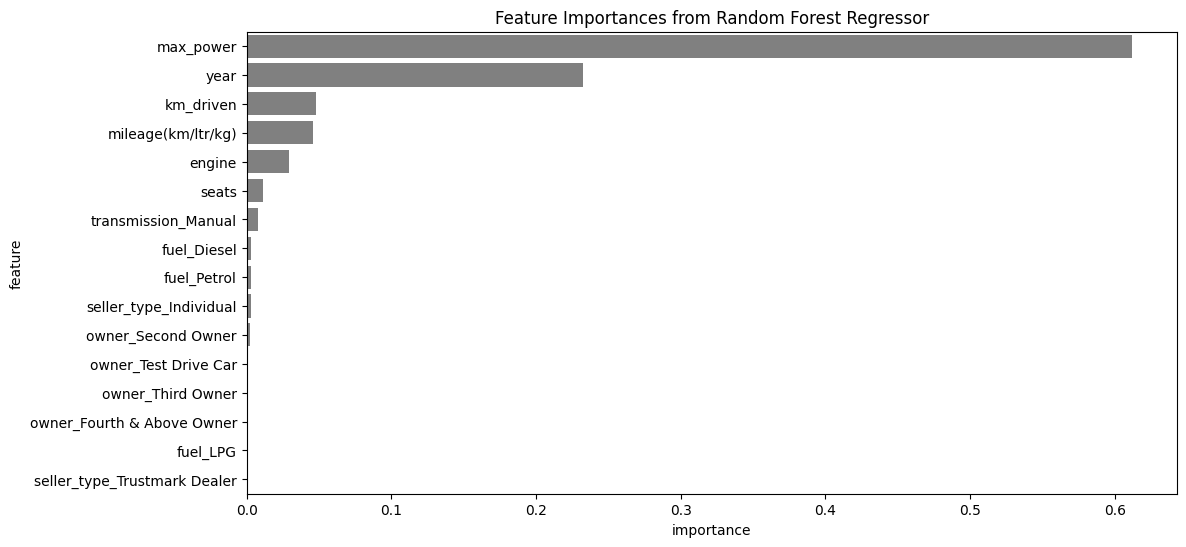

In [ ]:
# getting feature importances from the best model Random Forest Regressor
best_model = model_RandomForestRegressor
feature_importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, color='grey')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()

### Feature Importance Analysis — Random Forest Regressor

The Random Forest model provides valuable insights into the factors that most strongly influence the car selling price. The feature importance chart highlights the following:

* Key Drivers of Car Price

1. Max Power (≈ 0.62 importance)

This is the single biggest predictor of price.

Cars with higher engine power tend to be significantly more expensive due to performance benefits and stronger engines.

2. Year (≈ 0.24 importance)

Newer cars command higher resale value.

This feature captures depreciation trends—cars lose value as they get older.

3. km_driven (≈ 0.06)

Mileage strongly impacts value:

Lower kilometers → lower wear and tear → higher price.

High driven cars depreciate faster.

Mileage (km/ltr/kg) and Engine CC

These features have moderate impact.

Efficient engines and larger engine capacities correlate with better pricing.

Minor Predictors

Features like:

Seats

Transmission (Manual/Automatic)

Fuel type (Petrol/Diesel/LPG)

Seller type

Ownership category

have very low importance.
This indicates that market value is driven more by performance and age rather than categorical attributes.

Insights

The model relies heavily on performance-related variables (max_power, engine) and vehicle age to determine price.

Categorical variables contribute minimally, confirming that customers place higher monetary value on car condition and capability.

For future improvement, collecting additional features like service history, accident records, and car brand segment may enhance predictive power.

------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion 

The Random Forest model demonstrates strong performance in predicting car prices, supported by its ability to capture non-linear relationships and interactions among features. The analysis clearly shows that engine capability (max_power) and vehicle age (year) are the dominant factors influencing resale value. Mileage and engine size also contribute moderately, aligning with real-world buyer behavior where performance and car condition strongly drive pricing decisions.

Categorical attributes such as fuel type, transmission, seller type, and ownership history have minimal predictive impact, suggesting that the model primarily relies on quantifiable performance features rather than classification-based characteristics.

Overall, the Random Forest Regressor emerges as a robust and reliable model for this dataset, offering both strong predictive accuracy and interpretable feature insights.

Business Recommendations (Data-Backed)
1. Prioritize Performance Features in Listings

Since max_power and engine size are the top price drivers, sellers should highlight:

Engine power

Engine CC

0–100 km/h performance

Any modifications or upgrades

This can help justify a higher selling price.

2. Emphasize Vehicle Age and Maintenance Condition

Buyers care about how new the vehicle is.
Sellers should clearly document:

Service records

Accident-free history

Recent maintenance or replacements

Newer and well-maintained vehicles achieve significantly better prices.

3. Optimize Pricing Based on Usage (km_driven)

High mileage sharply reduces value.
For cars with high km_driven:

Recommend competitive pricing

Provide proof of maintenance to reduce buyer hesitation

4. Categorical Attributes Need Not Be Pricing Focus

Since seller_type, fuel type, and transmission have negligible impact, pricing strategies should not heavily rely on these categories.

5. Consider Adding More Data for Better Accuracy

To further increase model performance, the company should collect:

Accident/repair history

Number of previous owners

Regional resale trends

Car brand category (luxury vs budget)

Feature packages (sunroof, infotainment, airbags, etc.)

These features can further strengthen pricing accuracy.